In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [8]:
# Load dataset
df = pd.read_csv(r"D:\Buildables Internship\BuildablesDataScienceFellowship\Task#11\diabetes_dataset.csv")

In [9]:
# ================= 1. Data Exploration =================
print("Shape:", df.shape)
print(df.head())
print(df.info())

Shape: (100000, 16)
   year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

  smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes  
0           never  27.32          5.0

In [10]:
# ================= 2. Data Preprocessing =================
# Handle missing values (if any)
df = df.fillna(df.median(numeric_only=True))

In [ ]:
# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
	le = LabelEncoder()
	df[col] = le.fit_transform(df[col])

In [13]:
# Features and target
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [14]:
# Standardize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# ================= 3A. Logistic Regression =================
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:,1]

In [17]:
# Evaluation Metrics
print("\n--- Logistic Regression Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))


--- Logistic Regression Metrics ---
Accuracy: 0.9608
Precision: 0.869951534733441
Recall: 0.6335294117647059
ROC-AUC: 0.9611997107039537


In [18]:
# ================= 3B. Decision Tree =================
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [19]:
# Evaluation Metrics
print("\n--- Decision Tree Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-Score:", f1_score(y_test, y_pred_dt))


--- Decision Tree Metrics ---
Accuracy: 0.9513
Precision: 0.70347533632287
Recall: 0.7382352941176471
F1-Score: 0.7204362801377727


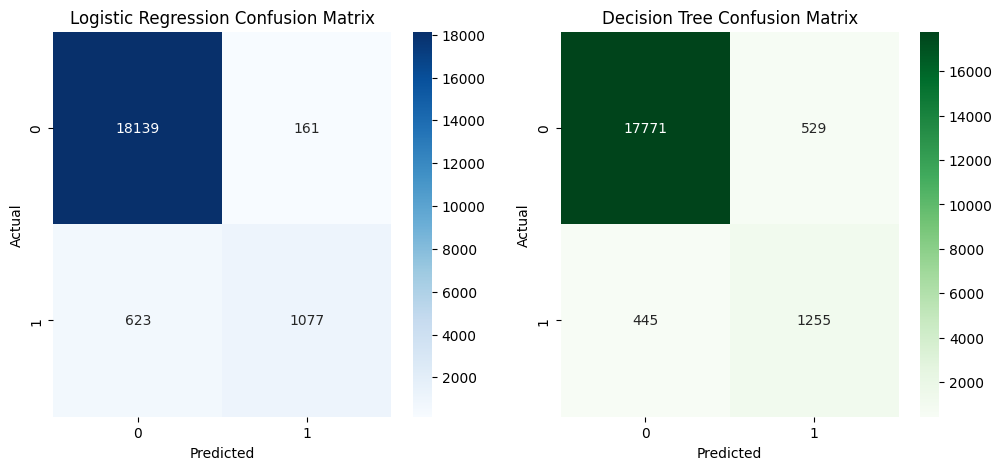

In [22]:
# ================= 4. Confusion Matrices =================
cm_log = confusion_matrix(y_test, y_pred_log)
cm_dt = confusion_matrix(y_test, y_pred_dt)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")


sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("Decision Tree Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")


plt.show()

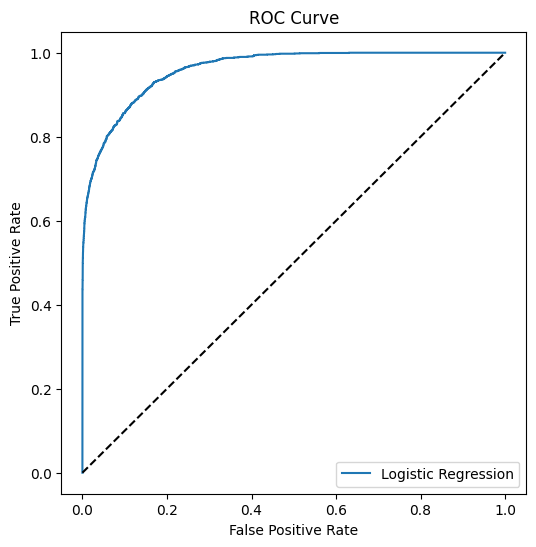

In [23]:
# ================= 5. ROC Curve (Logistic Regression) =================
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()